In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings

warnings.filterwarnings("ignore")

# Student Data Overview

## Student ID
- **StudentID**: A unique identifier assigned to each student (1001 to 3392).

## Demographic Details
- **Age**: The age of the students ranges from 15 to 18 years.
- **Gender**: Gender of the students, where 0 represents Male and 1 represents Female.
- **Ethnicity**: The ethnicity of the students, coded as follows:
  - 0: Caucasian
  - 1: African American
  - 2: Asian
  - 3: Other

## Parental Education
- **ParentalEducation**: The education level of the parents, coded as follows:
  - 0: None
  - 1: High School
  - 2: Some College
  - 3: Bachelor's
  - 4: Higher

## Study Habits
- **StudyTimeWeekly**: Weekly study time in hours, ranging from 0 to 20.
- **Absences**: Number of absences during the school year, ranging from 0 to 30.
- **Tutoring**: Tutoring status, where 0 indicates No and 1 indicates Yes.

## Parental Involvement
- **ParentalSupport**: The level of parental support, coded as follows:
  - 0: None
  - 1: Low
  - 2: Moderate
  - 3: High
  - 4: Very High

## Extracurricular Activities
- **Extracurricular**: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
- **Sports**: Participation in sports, where 0 indicates No and 1 indicates Yes.
- **Music**: Participation in music activities, where 0 indicates No and 1 indicates Yes.
- **Volunteering**: Participation in volunteering, where 0 indicates No and 1 indicates Yes.

## Academic Performance
- **GPA**: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.

## Target Variable: Grade Class
- **GradeClass**: Classification of students' grades based on GPA:
  - 0: 'A' (GPA >= 3.5)
  - 1: 'B' (3.0 <= GPA < 3.5)
  - 2: 'C' (2.5 <= GPA < 3.0)
  - 3: 'D' (2.0 <= GPA < 2.5)
  - 4: 'F' (GPA < 2.0)


#### First we will read and explore the dataset 

In [3]:
df = pd.read_csv('Student_performance_data _.csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [5]:
df.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

##### No null values

#### Note: All data types are integers and floats. However, it has categorical data.

## Preparing Data for Visualization

In [4]:
dfc = df.copy()

In [5]:
dfc.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [6]:
dfc['activities']  = np.sum(dfc[['Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering']], axis=1)

In [7]:
ParentalSupport={0: 'None',
                1: 'Low',
                2: 'Moderate',
                3: 'High',
                4: 'Very High'}

dfc['ParentalSupport'] = dfc['ParentalSupport'].replace(ParentalSupport)

Ethnicity = {0: 'Caucasian',
            1: 'African American',
            2: 'Asian',
            3: 'Other'}

dfc['Ethnicity'] = dfc['Ethnicity'].replace(Ethnicity)

ParentalEdu = {0: 'None',
            1: "High School",
            2: "Some College",
            3: "Bachelor's",
            4: 'Higher'}

dfc['ParentalEducation'] = dfc['ParentalEducation'].replace(ParentalEdu)

GradeClass = {0: 'A',
            1: 'B',
            2: 'C',
            3: 'D',
            4: 'F'}

dfc['GradeClass'] = dfc['GradeClass'].replace(GradeClass)

yn = {0: 'No',
     1: 'Yes'}

dfc['Tutoring'] = dfc['Tutoring'].replace(yn)
dfc['Extracurricular'] = dfc['Extracurricular'].replace(yn)
dfc['Sports'] = dfc['Sports'].replace(yn)
dfc['Music'] = dfc['Music'].replace(yn)
dfc['Volunteering'] = dfc['Volunteering'].replace(yn)

mf = {0: 'Male',
     1: 'Female'}

dfc['Gender'] = dfc['Gender'].replace(mf)


In [8]:
dfc.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,activities
0,1001,17,Female,Caucasian,Some College,19.833723,7,Yes,Moderate,No,No,Yes,No,2.929196,C,2
1,1002,18,Male,Caucasian,High School,15.408756,0,No,Low,No,No,No,No,3.042915,B,0
2,1003,15,Male,Asian,Bachelor's,4.210570,26,No,Moderate,No,No,No,No,0.112602,F,0
3,1004,17,Female,Caucasian,Bachelor's,10.028829,14,No,High,Yes,No,No,No,2.054218,D,1
4,1005,17,Female,Caucasian,Some College,4.672495,17,Yes,High,No,No,No,No,1.288061,F,1


### Visualizations

In [8]:
sns.set_style('darkgrid')
sns.set_context('notebook')

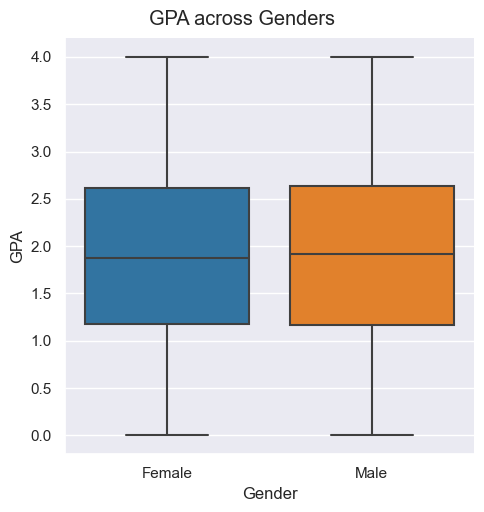

In [20]:
g = sns.catplot(x='Gender', y='GPA', data=dfc, kind='box')

g.fig.suptitle('GPA across Genders', y=1.02)
plt.show();
g.savefig('GPA across Genders', dpi=300)

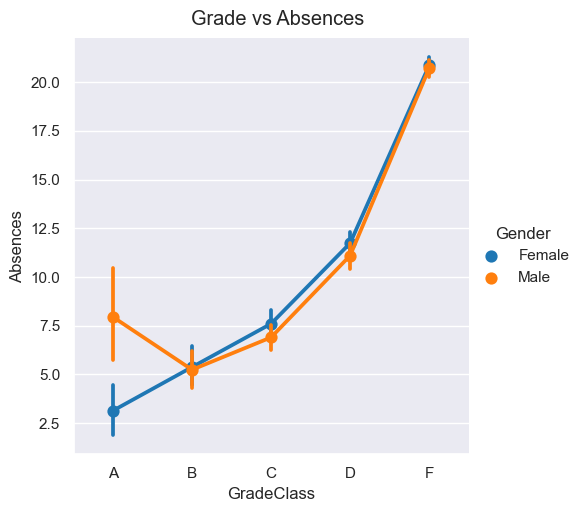

In [42]:
order = ['A', 'B', 'C', 'D', 'F']
g = sns.catplot(x='GradeClass', y='Absences', data=dfc, hue='Gender', kind='point', order=order)
g.fig.suptitle('Grade vs Absences', y=1.02)
g.savefig('GPA across Absences', dpi=300)

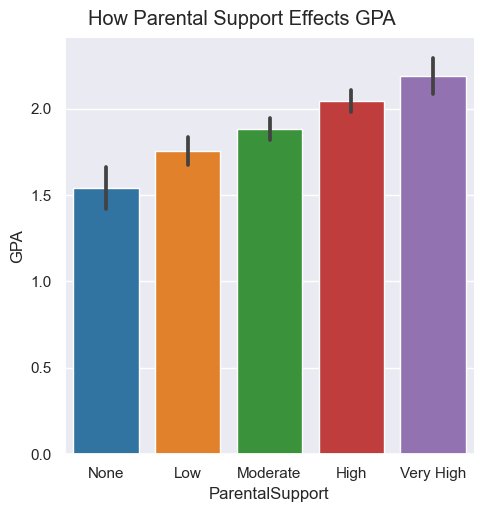

In [22]:
order=['None', 'Low', 'Moderate', 'High', 'Very High']
g = sns.catplot(x='ParentalSupport', y='GPA', data=dfc, kind='bar', order=order)
g.fig.suptitle('How Parental Support Effects GPA', y=1.02)
plt.show();
g.savefig('How Parental Support Effects GPA', dpi=200)

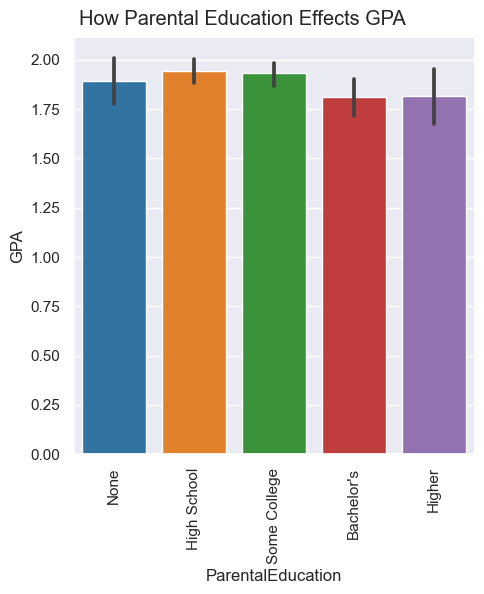

In [23]:
order = ['None', "High School", "Some College", "Bachelor's", 'Higher']
g = sns.catplot(x='ParentalEducation', y='GPA', data=dfc, kind='bar', order=order)
g.set_xticklabels(rotation=90)
g.fig.suptitle('How Parental Education Effects GPA', y=1.02)
plt.show()

### GPA is normally distributed

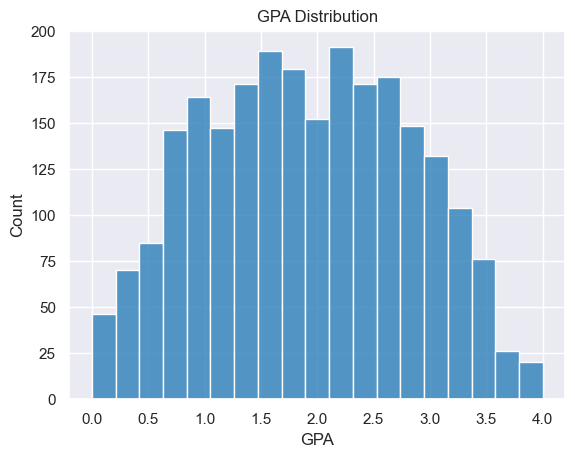

In [24]:
g = sns.histplot(dfc['GPA'])
g.set_title('GPA Distribution')
plt.show()

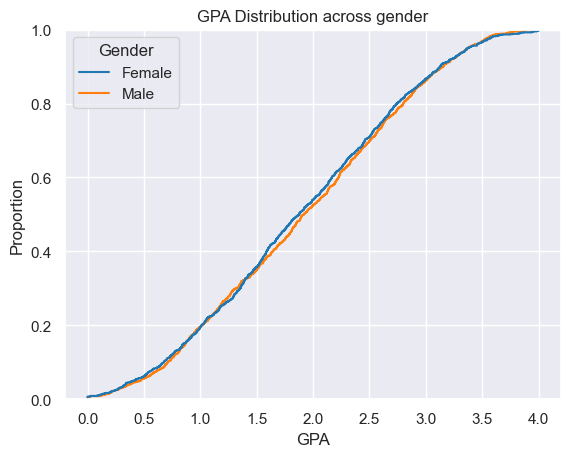

In [14]:
g = sns.ecdfplot(x='GPA', data=dfc, hue='Gender')
g.set_title('GPA Distribution across gender')
plt.show();
# to save axes
fig = g.get_figure()
# fig.savefig('GPA Distribution', dpi=200)

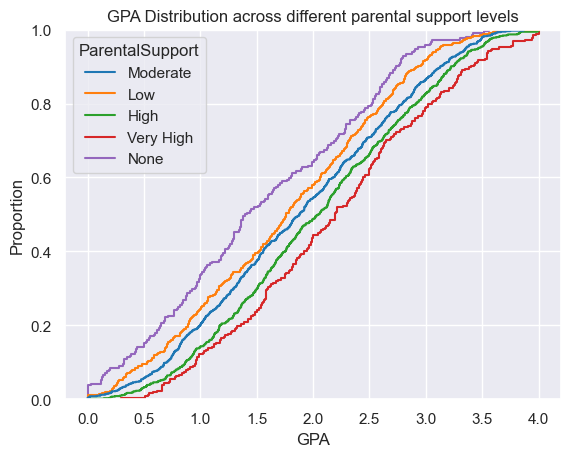

In [52]:
g = sns.ecdfplot(x='GPA', data=dfc, hue='ParentalSupport')
g.set_title('GPA Distribution across different parental support levels')
plt.show();
# to save axes
# fig = g.get_figure()
# fig.savefig('GPA Distribution', dpi=200)

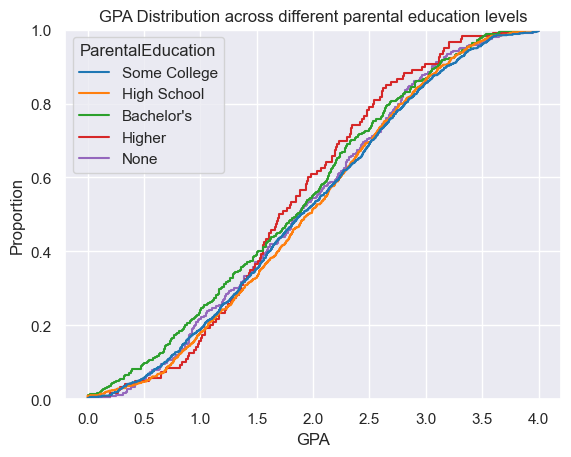

In [53]:
g = sns.ecdfplot(x='GPA', data=dfc, hue='ParentalEducation')
g.set_title('GPA Distribution across different parental education levels')
plt.show();
# to save axes
# fig = g.get_figure()
# fig.savefig('GPA Distribution', dpi=200)

### Higher number of activities for Females results in higher GPA in comparison with Males

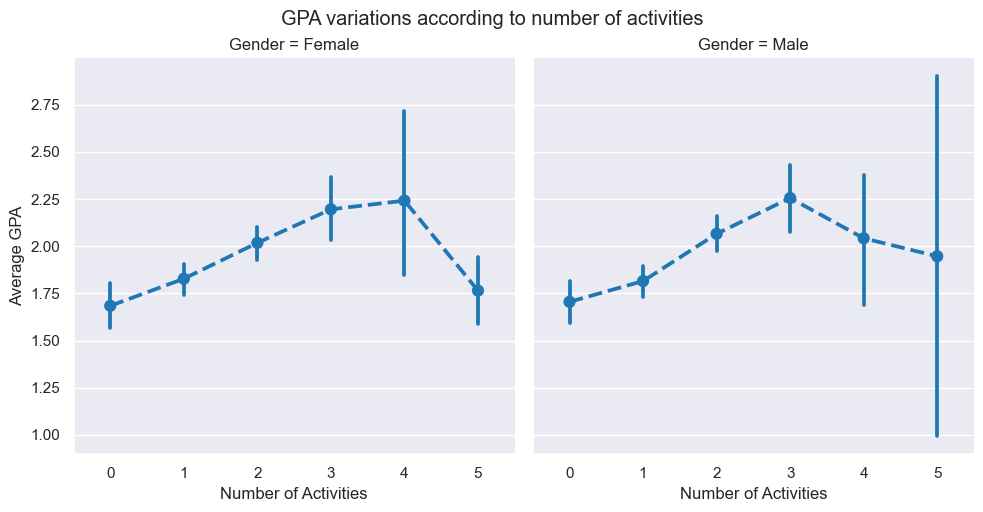

In [95]:
g = sns.catplot(x='activities', y='GPA', data=dfc, kind='point', col='Gender', linestyles='--', estimator=np.mean)
g.set(xlabel='Number of Activities', ylabel='Average GPA')
g.fig.suptitle('GPA variations according to number of activities', y=1.02)
plt.show()

In [101]:
# GPA values down bellow shows why the error bar is so all over the place, they're only two records 2.9 and 0.9
dfc[(dfc['activities']==5) & (dfc['Gender']=='Male')]['GPA']

1203    2.901186
1822    0.992297
Name: GPA, dtype: float64

In [20]:
dfc.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,activities
0,1001,17,Female,Caucasian,Some College,19.833723,7,Yes,Moderate,No,No,Yes,No,2.929196,C,2
1,1002,18,Male,Caucasian,High School,15.408756,0,No,Low,No,No,No,No,3.042915,B,0
2,1003,15,Male,Asian,Bachelor's,4.210570,26,No,Moderate,No,No,No,No,0.112602,F,0
3,1004,17,Female,Caucasian,Bachelor's,10.028829,14,No,High,Yes,No,No,No,2.054218,D,1
4,1005,17,Female,Caucasian,Some College,4.672495,17,Yes,High,No,No,No,No,1.288061,F,1


In [59]:
acts = ['Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

df_melted = pd.melt(dfc, id_vars='StudentID',
                   value_vars=acts,
                   var_name='Activity', value_name='Participation')

df_melted['Participation'] = df_melted['Participation'].replace({'Yes':1, 'No':0})

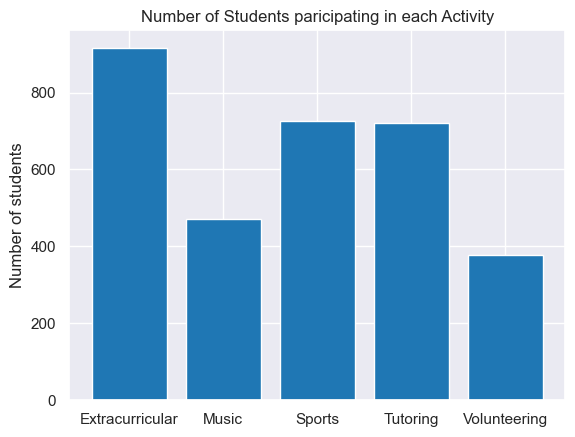

In [63]:
cnts = df_melted.groupby('Activity')['Participation'].sum()
plt.bar(cnts.index.tolist(), cnts.values.tolist())
plt.ylabel('Number of students')
plt.title('Number of Students paricipating in each Activity')
plt.show()